# Descriptive Statistics and Data Visualization
This notebook covers exploratory analysis for 430 features<br>
coming from 9 different categories of clinical data<br>
The analysis will include three steps:<br>
1. Extract Descriptive Statistics for each feature
2. Visualize the distribution 
3. Brief Summary of Findings

<br>

| Table Name |variable prefix|columns |DType |Description | 
| :--- | :--- | :--- | :--- | :--- |
| Research Session Attendance|rsa_|25 |Binary|Records attendence for each week of treatment | 
| Demographics|dem_|10 |Categorical|Sex, Ethnicity, Race | 
| Urine Drug Screen| test_|225|Binary  |Drug test for 8 different drug classes, taken weekly for 24 weeks | 
| DSM-IV Diagnosis|dsm_|6|Categorical |Tracks clinical diagnosis for substance use disorder, in accordance with DSM guidelines| 
| Medical and Psychiatric History|mdh_|18|Categorical |Tracks medical and psychiatric history of 18 different Conditions| 
| Physical Exam|pex_|12|Categorical |Tracks the appearance and condition of patients for 12 different physical observations| 
| Timeline Follow Back Survey|survey_|70|Numeric |Surveys for self reported drug use, collected every 4 weeks, records total number of instances of drug use for the previous 30 days|
| Dose Record |meds_|50|Numeric |Records the medication, averge weekly dose and week of treatment| 


### Import Required Libraries

In [1]:
import pandas as pd # data manipulation
import numpy as np # numerical computation
import matplotlib.pyplot as plt # visualization
import seaborn as sns # enhanced visualization
import warnings # ignore warnings
import helper # custom data transformation functions
from IPython.display import display, Markdown # display and markdown conversion
import re # regular expressions
warnings.filterwarnings('ignore') # ignore warnings

# Load the data
data = pd.read_csv('../data/63_features.csv')

# Display the first few rows of the data
print('Data shape:', data.shape)
display(data)

Data shape: (1269, 63)


,test_oxycodone_0,test_cocaine_0,test_methamphetamine_0,test_opiate300_0,test_oxycodone_1,test_cocaine_1,test_methamphetamine_1,test_opiate300_1,test_oxycodone_2,test_cocaine_2,...,pex_musculoskeletal,pex_gi_system,pex_extremeties,pex_neurological,pex_gen_appearance,pex_ears_nose_throat,pex_head_neck,pex_cardio,pex_skin,dropout
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1265,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1266,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1267,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,1.0


## Create Density Plot for Dropout

In [2]:
data

,test_oxycodone_0,test_cocaine_0,test_methamphetamine_0,test_opiate300_0,test_oxycodone_1,test_cocaine_1,test_methamphetamine_1,test_opiate300_1,test_oxycodone_2,test_cocaine_2,...,pex_musculoskeletal,pex_gi_system,pex_extremeties,pex_neurological,pex_gen_appearance,pex_ears_nose_throat,pex_head_neck,pex_cardio,pex_skin,dropout
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1265,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1266,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1267,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,1.0


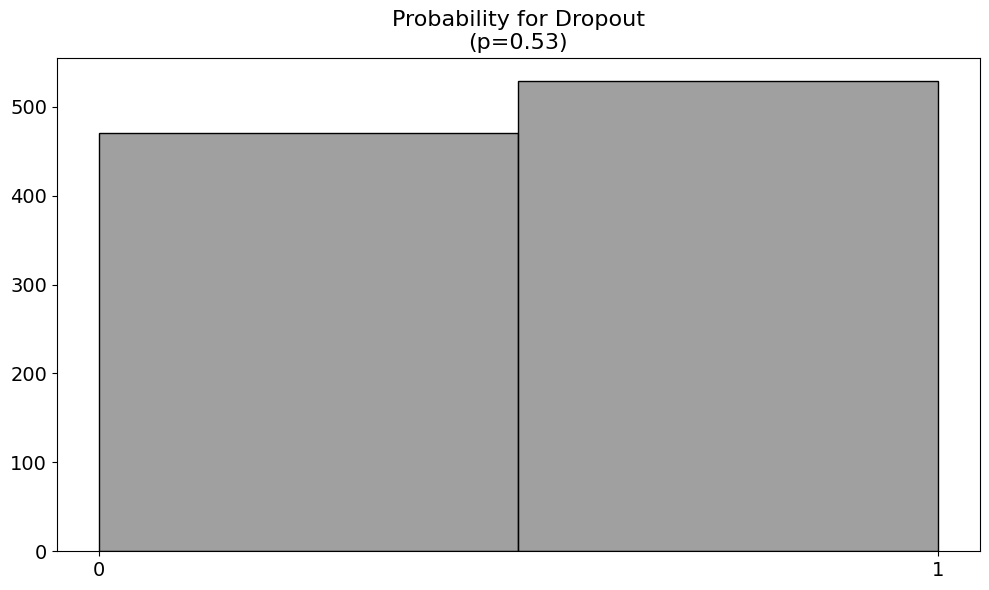

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming `tests` is a DataFrame that contains the `dropout` column
# Calculate the probability of the positive class for the `dropout` column
p_dropout = data['dropout'].mean()

# Generate Bernoulli distributed data based on this probability
data_dropout = np.random.binomial(1, p_dropout, 1000)

# Create a histogram plot for the `dropout` column
plt.figure(figsize=(10, 6))
sns.histplot(data_dropout, kde=False, bins=2, color='gray')
plt.title(f'Probability for Dropout\n(p={p_dropout:.2f})', fontsize=16)
plt.xticks([0, 1], ['0', '1'], fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('')  # Remove y-axis label
plt.gca().yaxis.set_label_text('')  # Remove the word "Frequency" from y-axis

# Display the plot
plt.tight_layout()
plt.show()

## Create Dual Bar Plot for Medication Dose Table

In [ ]:
# subset methadone patients
meds_m = data[[col for col in data.columns if 'meds_m' in col]].iloc[:, 1:5]
# remove rows with all 0
meds_m = meds_m[meds_m.sum(axis=1) != 0]

# subset buprenorphine patients
meds_b = data[[col for col in data.columns if 'meds_b' in col]].iloc[:, 1:5]
# remove rows with all 0
meds_b = meds_b[meds_b.sum(axis=1) != 0]

In [ ]:
import matplotlib.pyplot as plt

# Assuming meds_m is a DataFrame with at least 4 columns
fig, ax = plt.subplots(1, 4, figsize=(20, 5))  # Create a figure with 4 subplots in 1 row

# Titles for each subplot
titles = ['Methadone Avg Daily Dose - Week 1', 'Methadone Avg Daily Dose - Week 2', 'Methadone Avg Daily Dose - Week 3', 'Methadone Avg Daily Dose - Week 4']

# Plot histograms for the first 4 columns of meds_m
for i, column in enumerate(meds_m.columns[:4]):
    meds_m[column].hist(ax=ax[i], color='gray', bins=10)
    ax[i].set_title(titles[i], fontsize=15)  # Set the title to the corresponding week with larger font size
    ax[i].tick_params(axis='both', which='major', labelsize=15)  # Set tick parameters with larger font size
    ax[i].grid(False)  # Remove the background grid

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

In [ ]:
# Assuming meds_m is a DataFrame with at least 4 columns
fig, ax = plt.subplots(1, 4, figsize=(20, 5))  # Create a figure with 4 subplots in 1 row

# Titles for each subplot
titles = ['Buprenorphine Avg Daily Dose - Week 1', 'Buprenorphine Avg Daily Dose - Week 2', 'Buprenorphine Avg Daily Dose - Week 3', 'Buprenorphine Avg Daily Dose - Week 4']

# Plot histograms for the first 4 columns of meds_m
for i, column in enumerate(meds_b.columns[:4]):
    meds_b[column].hist(ax=ax[i], color='gray', bins=10)
    ax[i].set_title(titles[i], fontsize=15)  # Set the title to the corresponding week with larger font size
    ax[i].tick_params(axis='both', which='major', labelsize=15)  # Set tick parameters with larger font size
    ax[i].grid(False)  # Remove the background grid

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

In [ ]:
tests = data[[col for col in data.columns if 'test' in col]]

tests

In [ ]:
# plot drug test counts for first 4 weeks of treatment

# create df with count of all drug tests
drugs = ['oxycodone', 'cocaine', 'methamphetamine', 'opiate300']

# Create a df for each drug class with the corresponding columns
for drug in drugs:
    globals()[drug] = tests[[col for col in tests.columns if drug in col]]
    # Remove column names, leaving suffix for week of treatment
    globals()[drug].columns = [re.sub('.*?_', '', col) for col in globals()[drug].columns]
    # Apply sum aggregation to columns
    globals()[drug] = globals()[drug].sum(axis=0).to_frame(f'{drug}').reset_index(drop=True)

# Merge all drug classes into a single df
drug_tests = pd.concat([oxycodone, cocaine, methamphetamine, opiate300], axis=1).reset_index(drop=True)

drug_tests

In [ ]:
tests = data[[col for col in data.columns if 'test' in col]]

tests

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the mean (probability p) for each column in the tests DataFrame
probabilities = tests.mean()

# Number of columns per plot
num_cols = 4

# Split the columns into chunks of 4
chunks = [tests.columns[i:i + num_cols] for i in range(0, len(tests.columns), num_cols)]

# Function to format the title
def format_title(title):
    parts = title.split('_')
    formatted_title = ' '.join(part.capitalize() for part in parts[:-1])
    formatted_title += f' Week {parts[-1]}'
    return formatted_title

# Loop through each chunk and create a separate plot
for chunk in chunks:
    # Create a figure with subplots (1 row and 4 columns)
    fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(20, 5))
    
    # Flatten the axes array for easy iteration
    axes = axes.flatten()
    
    # Loop through each column in the chunk and create a plot in the corresponding subplot
    for i, col in enumerate(chunk):
        p = probabilities[col]
        data = np.random.binomial(1, p, 1000)  # Generate Bernoulli distributed data
        
        sns.histplot(data, kde=False, bins=2, ax=axes[i], color='gray')
        formatted_title = format_title(col)
        axes[i].set_title(f'{formatted_title}\n(p={p:.2f})', fontsize=16)
        axes[i].set_xticks([0, 1])
        axes[i].set_xticklabels(['0', '1'], fontsize=14)
        axes[i].set_yticklabels([int(y) for y in axes[i].get_yticks()], fontsize=14)
        axes[i].set_ylabel('')  # Remove y-axis label
        axes[i].yaxis.set_label_text('')  # Remove the word "Frequency" from y-axis
    
    # Remove any unused subplots
    for j in range(len(chunk), num_cols):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the mean (probability p) for each column in the tests DataFrame
probabilities = tests.mean()

# Number of columns per plot
num_cols = 4

# Split the columns into chunks of 4
chunks = [tests.columns[i:i + num_cols] for i in range(0, len(tests.columns), num_cols)]

# Loop through each chunk and create a separate plot
for chunk in chunks:
    # Create a figure with subplots (1 row and 4 columns)
    fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(20, 5))
    
    # Flatten the axes array for easy iteration
    axes = axes.flatten()
    
    # Loop through each column in the chunk and create a plot in the corresponding subplot
    for i, col in enumerate(chunk):
        p = probabilities[col]
        data = np.random.binomial(1, p, 1000)  # Generate Bernoulli distributed data
        
        sns.histplot(data, kde=False, bins=2, ax=axes[i])
        axes[i].set_title(f'{col}\n(p={p:.2f})')
        axes[i].set_xticks([0, 1])
        axes[i].set_xticklabels(['0', '1'])
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
    
    # Remove any unused subplots
    for j in range(len(chunk), num_cols):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

In [ ]:
# create line plot with drug test df
plt.figure(figsize=(12, 6))
for drug in drugs:
    plt.plot(drug_tests[drug], label=drug)
plt.title('Positive Drug Test Counts by Week',fontsize=15)
plt.xlabel('Week of Treatment', fontsize=12)
plt.ylabel('Positive Test Count', fontsize=12)
# put legend outside of plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# only included 1 - 4 on x-axis
plt.xticks(np.arange(1, 5, 1))

plt.show()

In [ ]:
surveys = data[[col for col in data.columns if 'survey' in col]]

surveys

In [ ]:
# plot drug test counts for first 4 weeks of treatment

# create df with count of all drug tests
drugs = ['cannabis', 'oxycodone', 'cocaine', 'methamphetamine', 'opiates']

# Create a df for each drug class with the corresponding columns
for drug in drugs:
    globals()[drug] = surveys[[col for col in surveys.columns if drug in col]]
    # Remove column names, leaving suffix for week of treatment
    globals()[drug].columns = [re.sub('.*?_', '', col) for col in globals()[drug].columns]
    # Apply sum aggregation to columns
    globals()[drug] = globals()[drug].sum(axis=0).to_frame(f'{drug}').reset_index(drop=True)

# Merge all drug classes into a single df
tfb = pd.concat([cannabis, oxycodone, cocaine, methamphetamine, opiates], axis=1).reset_index(drop=True)

tfb

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Create a layered sns bar plot, create a bar plot for each row of tfb
plt.figure(figsize=(12, 4))

# Define a color palette, that is in grayscale
palette = sns.color_palette('Greys', tfb.shape[0])

# Create a list to store legend handles
handles = []

for i in range(tfb.shape[0]):
    sns.barplot(x=tfb.columns, y=tfb.iloc[i], color=palette[i], alpha=0.7)
    # Create a legend handle for each row
    handles.append(mpatches.Patch(color=palette[i], label=tfb.index[i]))

plt.title('Self Reported Drug Use, by Drug Class and Week of Treatment', fontsize=15)
plt.xlabel('Week of Treatment', fontsize=12)
plt.ylabel('Total Instances of Use', fontsize=12)
# Show legend outside of plot
plt.legend(handles=handles, title='Treatment Week', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()